# Week 1 Assignment: Running an analysis of variance

In this [assignment](https://www.coursera.org/learn/data-analysis-tools/peer/nhp1Q/running-an-analysis-of-variance) I've chosen the [Gapminder](./data/gapminder.csv) dataset. Looking through its [codebook](./data/GapMinderCodebook.pdf) we've decided to study two variables, incomeperperson and lifeexpectancy:


- incomeperperson

> 2010 Gross Domestic Product per capita in constant 2000 US$. The World Bank Work Development inflation but not the differences in the cost of living between countries Indicators
has been taken into account.



- lifeexpectancy

> 2011 life expectancy at birth (years). The average number of years a newborn child would live if current mortality patterns were to stay the same.

We'll be studying the relationship between the income and life expectancy. To fulfil the assignment requirements, we'll transformate the numeric variable `incomeperperson` into categorical using the [US poverty threshold](http://www.irp.wisc.edu/faqs/faq1.htm) as a guideline to divide this variable up in three values: countries wich income per capita is less than 40% of this threshold (not included) will be classified as **low income**, those between 40% (included) and the thresold (not included) will be classified as **medium income**, and those equal or above will be **high income**.

The null hypothesis $H_o$ is that the life expectancy between the countries with low, medium and high income are the same, or in other words, income is not a drive for life expectancy. The alternative $H_a$ hypothesis is that life expectancy between the classified countries are not the same.



In [87]:
# Import all ploting and scientific library,
# and embed figures in this file.
%pylab inline

# Package to manipulate dataframes.
import pandas as pd

# Nice looking plot functions.
import seaborn as sn

# Read the dataset.
df = pd.read_csv('data/gapminder.csv')

# Set the country name as the index of the dataframe.
df.index = df.country

# This column is no longer needed.
#del df['country']

# Select only the variables we're interested.
df = df[['incomeperperson','lifeexpectancy']]

# Convert the types properly.
df = df.convert_objects(convert_numeric=True)

# Remove missing values.
df = df.dropna()




Populating the interactive namespace from numpy and matplotlib


/Users/sergio/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:24: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


## Descriptive analysis

Let's take a look at the variables.

In [88]:
df.describe()

,incomeperperson,lifeexpectancy
count,176.000000,176.000000
mean,7327.444414,69.654733
std,10567.304022,9.729521
min,103.775857,47.794000
25%,702.366463,63.041500
50%,2385.184105,73.126500
75%,8497.779228,76.569500
max,52301.587179,83.394000


## Create the categorical variable

We'll create the categorical variable `income_level` based on the `incomeperperson` and the USA poverty threshold.

In [89]:
# http://www.irp.wisc.edu/faqs/faq1.htm
income_threshold= 11720
income_level = pd.cut(df.incomeperperson, 
    [0, income_threshold*0.4, income_threshold, 110000 ], 
    labels=['Low income', 'Medium income', 'High income'])


Looking at the distribution of countries by the new categorical variable `income_level` in the graph below, the majority of them take low income per capita, followed by high income and medium income.

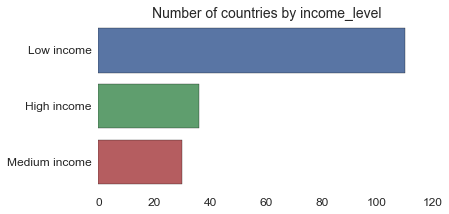

In [120]:
il = income_level.value_counts()
f, a = subplots()
f.set_size_inches(6,3)
sn.barplot(il.values, il.index.tolist(), ax=a);

a.set_title('Number of countries by income_level', fontsize=14);
yticks(fontsize=12),xticks(fontsize=12);

Let's save the `income_level` variable in our data frame. We must explicitly convert it to `object` because of an actual misunderstanding betwen `pandas` and `stastmodels` packages.

In [121]:
import numpy as np
df['income_level'] = income_level.astype(np.object)

Let's take a look at the population means by the `income_level` categories. The table and graph below show that the life expectancy means are diferent among the countries income levels, as our alternative hyphothesis $H_a$ states.

In [137]:
g = df.groupby('income_level')
income_mean = g.mean()
income_mean

,incomeperperson,lifeexpectancy
income_level,,
High income,25730.523512,80.185000
Low income,1389.885849,64.937373
Medium income,7014.797566,74.315400


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

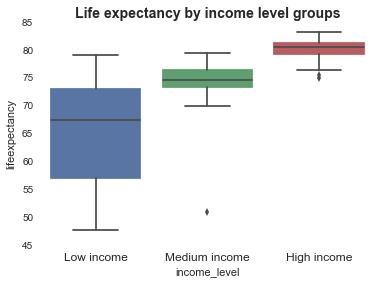

In [138]:
sn.boxplot(df.income_level, df.lifeexpectancy);
title('Life expectancy by income level groups', fontsize=14, fontweight='bold');
xticks(fontsize=12)

In the next session, we'll see whether $H_o$ can be rejected or not.

## Calculate the F statistic

The F value calculated below shows the variability between the three groups is 64 times greater than the variability within groups. The p-value $1.02*10^{-21}$ is far below 0.05, thus we can reject $H_o$ and select $H_a$: life expectancy varies across income per capita.

In [139]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
model = smf.ols('lifeexpectancy ~ C(income_level)', df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifeexpectancy   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     64.74
Date:                Sun, 08 Nov 2015   Prob (F-statistic):           1.02e-21
Time:                        09:47:51   Log-Likelihood:                -600.49
No. Observations:                 176   AIC:                             1207.
Df Residuals:                     173   BIC:                             1216.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercept                           80.1850      1.233     65.011      0.000        77.751    82.619
C(income_level)[T.Low income]      -15.2476      1.421    -10.730      0.000       -18.052   -12.443
C(income_level)[T.Medium income]    -5.8696      1.829     -3.208      0.002        -9.481    -2.259
==============================================================================
Omnibus:                       13.620   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.847
Skew:                          -0.708   Prob(JB):                     0.000597
Kurtosis:                       3.135   Cond. No.                         5.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Post hoc test

Finally, we'll conduct a post hoc test to see wich group of income level is diferent from the others. By the table below we can reject the equality between all pairwise comparison. So, <b>the life expectancy mean are diferent among income_level groups<b>.

In [140]:
res = multi.pairwise_tukeyhsd(df.lifeexpectancy, df.income_level)
print(res.summary())


     Multiple Comparison of Means - Tukey HSD,FWER=0.05    
   group1       group2    meandiff  lower    upper   reject
-----------------------------------------------------------
High income   Low income  -15.2476 -18.6072 -11.8881  True 
High income Medium income -5.8696  -10.1948 -1.5444   True 
 Low income Medium income  9.378    5.7743  12.9818   True 
-----------------------------------------------------------


## Conclusion

By the F statistic and post hoc test above, we can say that the incompe per capita is related to life expectancy. Remembering that this income variable is the ratio of Gross Domestic Prodcut by population, the more productive and economic developed a country is, the more its citizens can live.